In [1]:
# Transferencia de aprendizaje

In [2]:
# Crear nuestro propio conjunto de datos

In [3]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/AiArt/
   creating: dataset/AiArt/AiArtData/
  inflating: dataset/AiArt/AiArtData/-how-important-people-from-the-past-really-looked-11-Pics-5ffd5c0f4d77f__880.jpg  
  inflating: dataset/AiArt/AiArtData/-s-fluffy-fur-and-round-features-immediately-melted-the-viewer-s-heart-photo.jpg  
  inflating: dataset/AiArt/AiArtData/-using-generative-ai-technology-landscape-pattern-abstract-concept-269270897.jpg  
  inflating: dataset/AiArt/AiArtData/-yellow-kimono-with-a-golden-crown-and-a-very-detailed-Barn-owl-copy-800x800.jpg  
  inflating: dataset/AiArt/AiArtData/.amazonaws.com2Fpublic2Fimages2Ff89de3bb-279b-42c9-9822-a653fb5b21e6_600x480.png  
  inflating: dataset/AiArt/AiArtData/0002_AI-in-animal-classification.png  
  inflating: dataset/AiArt/AiArtData/00urban_biodiversity_landscape_architecture_14ed209d-45ca-4c57-b995-4d1552813cc1.jpg  
  inflating: dataset/AiArt/AiArtData/03a3gbCKfH8dDJnjhHLuHDf-1.fit_lim.v1665523315.png  
 

In [17]:
# aumento de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# crear el dataset generador
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    shear_range = 5,
    zoom_range = [0.7, 1.3],
    validation_split = 0.2,
)

data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset',
      target_size = (224, 224),
      batch_size = 32, shuffle=True,
      subset = 'training')

data_gen_pruebas = datagen.flow_from_directory('/content/dataset',
      target_size = (224, 224),
      batch_size = 32, shuffle=True,
      subset = 'validation')



Found 777 images belonging to 2 classes.
Found 193 images belonging to 2 classes.


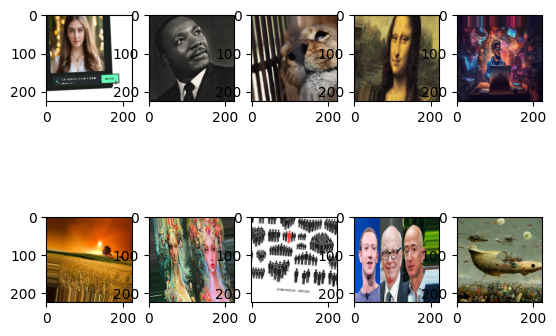

In [18]:
import matplotlib.pyplot as plt

for imagen, etiquetas in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(imagen[i])
  break
plt.show()

In [48]:

# url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
# mobilenetv2 = hub.KerasLayer(url, input_shape = (224, 224, 3))

In [49]:
# importante
# conjelar las capas

# mobilenetv2.trainable = False


In [61]:
# modelo = tf.keras.Sequential([
#     tf.keras.layers.Dense(2, activation = 'softmax')
# ])

In [102]:
import tensorflow as tf
import tensorflow_hub as hub

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# importante
# conjelar las capas
base_model.trainable = False  # Congela pesos

In [84]:
# Construcción del modelo
modelo = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),  # ¡Importante!
    tf.keras.layers.Dense(4, activation='softmax'),
    tf.keras.layers.Dense(2, activation='softmax')  # Salida de clasificación
])

In [85]:
modelo.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [86]:
epocas = 20
entrenamiento = modelo.fit(
    data_gen_entrenamiento,
    epochs = epocas,
    validation_data = data_gen_pruebas
)

Epoch 1/20
14/25 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5460 - loss: 0.6961

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5491 - loss: 0.6934

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5491 - loss: 0.6932 - val_accuracy: 0.5492 - val_loss: 0.6831
Epoch 2/20
 4/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6309 - loss: 0.6761

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6275 - loss: 0.6757

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6281 - loss: 0.6756 - val_accuracy: 0.6788 - val_loss: 0.6636
Epoch 3/20
22/25 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7061 - loss: 0.6566

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7082 - loss: 0.6561

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7088 - loss: 0.6560 - val_accuracy: 0.6943 - val_loss: 0.6522
Epoch 4/20
19/25 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7047 - loss: 0.6466

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7151 - loss: 0.6440

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7165 - loss: 0.6436 - val_accuracy: 0.7150 - val_loss: 0.6368
Epoch 5/20
 6/25 ━━━━━━━━━━━━━━━━━━━━ 13s 705ms/step - accuracy: 0.7407 - loss: 0.6374

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7692 - loss: 0.6274

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7697 - loss: 0.6270 - val_accuracy: 0.7202 - val_loss: 0.6278
Epoch 6/20
16/25 ━━━━━━━━━━━━━━━━━━━━ 8s 963ms/step - accuracy: 0.7666 - loss: 0.6104

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7804 - loss: 0.6062

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7815 - loss: 0.6058 - val_accuracy: 0.7202 - val_loss: 0.6138
Epoch 7/20
17/25 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8614 - loss: 0.5811

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8534 - loss: 0.5810

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8527 - loss: 0.5809 - val_accuracy: 0.7358 - val_loss: 0.5986
Epoch 8/20
21/25 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8527 - loss: 0.5604

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8496 - loss: 0.5611

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8490 - loss: 0.5613 - val_accuracy: 0.7461 - val_loss: 0.5952
Epoch 9/20
11/25 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8463 - loss: 0.5405

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8303 - loss: 0.5465

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8293 - loss: 0.5468 - val_accuracy: 0.7876 - val_loss: 0.5710
Epoch 10/20
 4/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8125 - loss: 0.5462

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8201 - loss: 0.5376

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8200 - loss: 0.5375 - val_accuracy: 0.7306 - val_loss: 0.5773
Epoch 11/20
24/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8679 - loss: 0.5072

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8677 - loss: 0.5073

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8674 - loss: 0.5074 - val_accuracy: 0.7824 - val_loss: 0.5595
Epoch 12/20
19/25 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8443 - loss: 0.5024

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8489 - loss: 0.4998

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8494 - loss: 0.4995 - val_accuracy: 0.7513 - val_loss: 0.5653
Epoch 13/20
15/25 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8623 - loss: 0.4770

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8601 - loss: 0.4766

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8600 - loss: 0.4764 - val_accuracy: 0.7461 - val_loss: 0.5281
Epoch 14/20
23/25 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.8558 - loss: 0.4567

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8553 - loss: 0.4573

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8552 - loss: 0.4576 - val_accuracy: 0.7824 - val_loss: 0.5253
Epoch 15/20
14/25 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9132 - loss: 0.4294

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8979 - loss: 0.4321

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8966 - loss: 0.4325 - val_accuracy: 0.7772 - val_loss: 0.5152
Epoch 16/20
22/25 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8846 - loss: 0.4153

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8840 - loss: 0.4156

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8838 - loss: 0.4157 - val_accuracy: 0.7772 - val_loss: 0.5015
Epoch 17/20
23/25 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.8804 - loss: 0.4030

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8794 - loss: 0.4035

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8790 - loss: 0.4037 - val_accuracy: 0.7927 - val_loss: 0.4976
Epoch 18/20
13/25 ━━━━━━━━━━━━━━━━━━━━ 11s 960ms/step - accuracy: 0.9067 - loss: 0.3809

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8902 - loss: 0.3933

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8890 - loss: 0.3942 - val_accuracy: 0.7720 - val_loss: 0.5089
Epoch 19/20
11/25 ━━━━━━━━━━━━━━━━━━━━ 12s 866ms/step - accuracy: 0.8832 - loss: 0.3823

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8739 - loss: 0.3913

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8736 - loss: 0.3916 - val_accuracy: 0.7772 - val_loss: 0.4953
Epoch 20/20
11/25 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8841 - loss: 0.3785

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8723 - loss: 0.3884

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8722 - loss: 0.3884 - val_accuracy: 0.7876 - val_loss: 0.4903


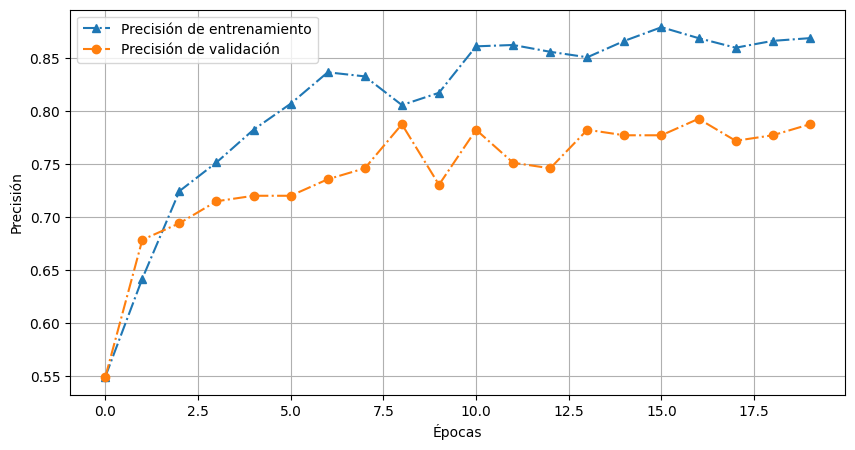

In [96]:
import matplotlib.pyplot as plt

# Gráfica de precisión
plt.figure(figsize=(10, 5))
plt.plot(entrenamiento.history['accuracy'], label='Precisión de entrenamiento', linestyle='-.',marker='^')
plt.plot(entrenamiento.history['val_accuracy'], label='Precisión de validación', linestyle='-.',marker='o')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

In [99]:
from sklearn.metrics import accuracy_score
print(accuracy_score(data_gen_pruebas.classes, np.argmax(modelo.predict(data_gen_pruebas), axis=-1)))


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 939ms/step

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 775ms/step
0.5181347150259067


In [101]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(data_gen_pruebas.classes, np.argmax(modelo.predict(data_gen_pruebas), axis=-1)))
confusion_matrix(data_gen_pruebas.classes, np.argmax(modelo.predict(data_gen_pruebas), axis=-1))

4/7 ━━━━━━━━━━━━━━━━━━━━ 2s 686ms/step

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 743ms/step
[[65 42]
 [47 39]]
5/7 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 752ms/step


array([[64, 43],
       [51, 35]])

In [87]:
from PIL import Image
import cv2

def categorizar(ruta):
  img = Image.open(ruta)
  img = img.convert('RGB')
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  if np.argmax(prediccion[0], axis=-1) == 0:
    return 'Arte Artificial'
  else:
    return 'Arte Real'
  return np.argmax(prediccion[0], axis=-1)


In [88]:
ruta = 'img_chica.png'
prediccion = categorizar(ruta)
print(prediccion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Arte Artificial


In [89]:
ruta = 'will_smith.jpg'
prediccion = categorizar(ruta)
print(prediccion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Arte Real
